# Random Matrix Theory: Semicircle Law Simulation

**Abstract** This notebook demonstrates the simulation of random symmetric matrices and visualises the distribution of their eigenvalues. As the matrix size $N$ increases, the eigenvalue distribution converges to Wigner's semicircle law. The semicircle law states that for a large $N \times N$ symmetric random matrix $W_N$ with entries drawn from a normal distribution, the eigenvalues are distributed according to the density:

$$
\sigma(x) = \frac{\sqrt{4 - x^2}}{2\pi} \quad \text{for} \quad |x| \leq 2.
$$

**Theorem**

Let $(X_{i,j})_{1\le i<j}$ and $(Y_i)_{i\ge1}$ be two independent families of i.i.d. real random variables with zero mean and variance $\mathbb{E}[Z_{1,2}^2]=1$. Consider the matrix $W_N$ defined by $$W_N(i,j) = W_N(j,i) = \begin{cases}
         Z_{i,j}/\sqrt{N}, \text{ si } i<j, \\
         Y_i / \sqrt{N}, \text{ si } i=j
    \end{cases}$$
Let $\lambda_i^N$ denote the eigenvalues of $W_N$, such that $\lambda_1^N\le\cdots\le\lambda_N^N$, and let $\mu_N$ be the empirical measure associated with the eigenvalues of $W_N$ defined as $$\mu_N := \frac{1}{N}\sum_{i=1}^N\delta_{\lambda_i^N}$$
where $\delta_x$ is the Dirac measure at $x$. Then, the empirical measure $\mu_N$ converges weakly to the probability measure $d\sigma(x)=\frac{\sqrt{4 - x^2}}{2\pi} 1_{|x| \leq 2}dx$ as $N$ tends to $+\infty$.

<!--
deux familles indépendantes de variables aléatoires réelles iid, centrées, telles que $\mathbb{E}[Z_{1,2}^2]=1$. On considère la matrice $W_N$ définie par $$W_N(i,j) = W_N(j,i) = \begin{cases}
         Z_{i,j}/\sqrt{N}, \text{ si } i<j, \\
         Y_i / \sqrt{N}, \text{ si } i=j
     \end{cases}$$ 1. On note $\lambda_i^N$ les valeurs propres de $W_N$, avec $\lambda_1^N\le\cdots\le\lambda_N^N$. 2. On définit la mesure empirique $\mu_N$ associée aux valeurs propres de $W_N$ par $$\mu_N := \frac{1}{N}\sum_{i=1}^N\delta_{\lambda_i^N}$$
où $\delta_x$ est la mesure de Dirac en $x$. Illustrer la convergence faible de $\mu_N$ vers la mesure de probabilité $\sigma(x)dx$ ayant pour densité $$\sigma(x)=\frac{1}{2\pi}\sqrt{4-x^2}1_{|x|\le2}(x)$$
sur $\mathbb{R}$ -->


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("pastel")

In [2]:
# Define functions
def generate_WN(N):
    """
    This function creates an N x N symmetric random matrix W_N with the following properties:
    - Off-diagonal entries X_{i,j} are drawn from a standard normal distribution.
    - Diagonal entries Y_i are also drawn from a standard normal distribution.
    - The matrix is normalised by sqrt{N} to ensure convergence to the semicircle law.
    """
    # Générer les éléments hors diagonale (X_{i,j} pour i < j)
    X = np.random.normal(0, 1, (N, N))
    X = np.triu(X, 1)
    X = X + X.T

    # Generate diagonal elements
    Y = np.random.normal(0, 1, N)
    np.fill_diagonal(X, Y)

    # Normalise
    return X / np.sqrt(N)


def semicircle_law(x):
    return np.sqrt(4 - x**2) / (2 * np.pi) * (np.abs(x) <= 2)

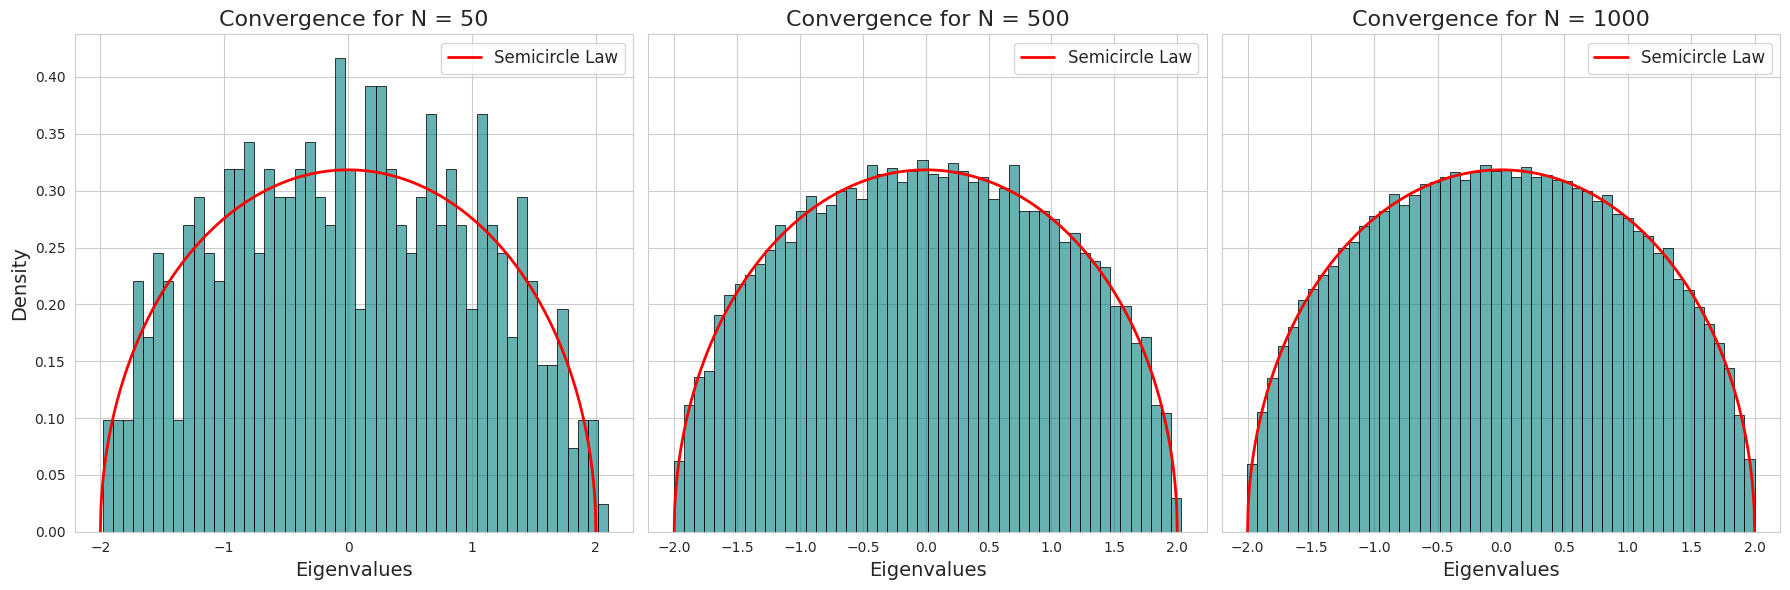

In [3]:
# Parameters
np.random.seed(123)
N_values = [50, 500, 1000]  # Matrix sizes
num_realisations = 10  # Number of realisations for each N

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, N in enumerate(N_values):
    eigenvalues = []
    for _ in range(num_realisations):
        WN = generate_WN(N)
        eigvals = np.linalg.eigvalsh(WN)  # Eigenvalues for symmetric matrix
        eigenvalues.extend(eigvals)

    # Plot histogram
    ax = axes[idx]
    sns.histplot(eigenvalues, bins=50, stat="density", color="teal",
                 edgecolor="black", alpha=0.6, ax=ax)

    # Plot semicircle law
    x = np.linspace(-2, 2, 1000)
    ax.plot(x, semicircle_law(x), 'r-', linewidth=2, label="Semicircle Law")

    # Labels and title
    ax.set_xlabel("Eigenvalues", fontsize=14)
    if idx == 0:
        ax.set_ylabel("Density", fontsize=14)
    ax.set_title(f"Convergence for N = {N}", fontsize=16)
    ax.legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## References

- Anderson, G. W., Guionnet, A., & Zeitouni, O. (2010). _An Introduction to Random Matrices_. Cambridge University Press.
